In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
data= pd.read_excel('..\\data\\data_all.xlsx')

In [3]:
data2 = pd.read_excel('data_yellow.xlsx')

In [23]:
pids = data['Patient ID'].unique()

In [29]:
data2

,Patient ID,Age,Sex,Height (in),Height (cm),Weight (Ib),Weight (kg),Time (min),VO2/kg STPD (ml/kg/m),VO2 STPD (L/min),...,VCO2 STPD (L/min),(ml/min).1,VE STPD (L/min),RQ,RR (BPM),VE/VO2 (BT/ST),METS,TM SPD(mph),Start,End
0,1,46,F,67.000000,170.179993,186.380997,84.718636,10:00,3.240702,0.274548,...,0.187871,187.870577,5.767894,0.684291,9.828010,26.038467,0.925915,0.0,40,58
1,1,46,F,67.000000,170.179993,186.380997,84.718636,10:18,3.516727,0.297932,...,0.201171,201.170638,6.319565,0.675223,10.215664,26.289713,1.004779,0.0,40,58
2,1,46,F,67.000000,170.179993,186.380997,84.718636,10:33,3.250189,0.275352,...,0.184475,184.475496,5.858399,0.669964,11.590470,26.369850,0.928625,0.0,40,58
3,1,46,F,67.000000,170.179993,186.380997,84.718636,10:45,3.492338,0.295866,...,0.199458,199.458122,6.244431,0.674150,10.535557,26.158564,0.997811,0.0,40,58
4,1,46,F,67.000000,170.179993,186.380997,84.718636,11:09,3.253784,0.275656,...,0.188681,188.680843,5.913777,0.684479,7.431874,26.589708,0.929653,0.0,40,58
5,1,46,F,67.000000,170.179993,186.380997,84.718636,11:17,2.975240,0.252058,...,0.173725,173.725083,5.513169,0.689226,7.884363,27.109190,0.850069,0.0,40,58
6,1,46,F,67.000000,170.179993,186.380997,84.718636,11:32,2.892640,0.245061,...,0.170633,170.632601,5.384082,0.696288,7.599747,27.230433,0.826469,0.0,40,58
7,1,46,F,67.000000,170.179993,186.380997,84.718636,11:49,2.879510,0.243948,...,0.174807,174.807489,5.234431,0.716576,10.625738,26.594280,0.822717,0.0,40,58
8,1,46,F,67.000000,170.179993,186.380997,84.718636,12:01,3.299136,0.279498,...,0.203950,203.950420,5.908507,0.729702,9.950249,26.200815,0.942610,0.0,40,58
9,1,46,F,67.000000,170.179993,186.380997,84.718636,12:15,3.675211,0.311359,...,0.227108,227.107674,6.575547,0.729408,12.784090,26.175018,1.050060,0.0,40,58


In [32]:
remain_std =[] # calculate the remanining data std
yellow_std = [] # calculate the yellow region data std
for pid in pids:
    data1 = data[data['Patient ID'] == pid]
    data1y = data2[data2['Patient ID'] == pid]
    yellow_std.append(data1y['VO2/kg STPD (ml/kg/m)'].std())
    
    data1merge = pd.merge(data1, data1y, how= 'left', on='Time (min)')
    remain_std.append(data1merge.loc[pd.isnull(data1merge['VO2/kg STPD (ml/kg/m)_y']), 'VO2/kg STPD (ml/kg/m)_x'].std())
    
    # Figure 1, make plots for VO2, VCO2 and RMR
    #fig, axes = plt.subplots(figsize=(10, 6))
    #data1merge.set_index("Time (min)")['VO2/kg STPD (ml/kg/m)_x'].plot(color='b',ax = axes)
    #data1merge.set_index("Time (min)")['VO2/kg STPD (ml/kg/m)_y'].plot(color='r', ax= axes)

out_std = pd.DataFrame()
out_std['Patient ID'] = pids
out_std['yellow_std'] = yellow_std
out_std['remain_std'] = remain_std





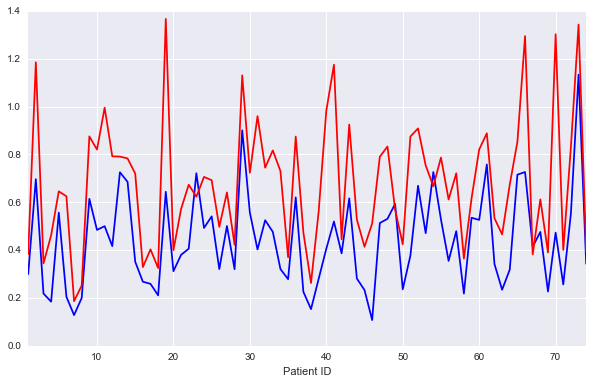

In [43]:
fig, axes = plt.subplots(figsize=(10, 6))
out_std.set_index('Patient ID')['yellow_std'].plot(kind='line',color='b')
out_std.set_index('Patient ID')['remain_std'].plot(kind='line',color='r')


In [44]:
%load_ext rpy2.ipython

In [49]:
%%R -i out_std

t.test(out_std$yellow_std,out_std$remain_std , paired=TRUE)


In [ ]:
# Figure 2: Distribution of the total test time

In [ ]:
# Figure 3: Distribution of the start time

In [ ]:
# Figure 4: Distribution of the length of yellow region

In [ ]:
# Conclusion: from Figure 2 to 4, decide what the optimal start time and length of the yellow region

In [ ]:
# Implement the Python GUI software which will take the raw testing data file and calcuate the RMR

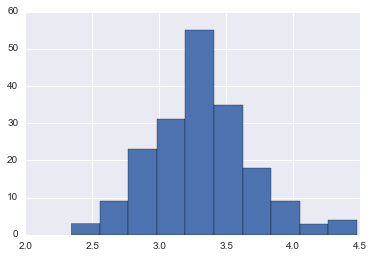

In [8]:
data[data['Patient ID'] == 1]['VO2/kg STPD (ml/kg/m)'].hist()

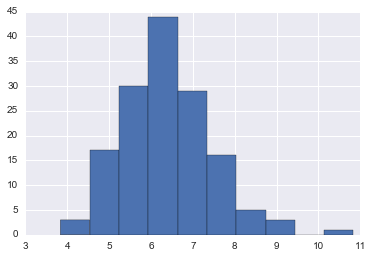

In [9]:
data[data['Patient ID'] == 2]['VO2/kg STPD (ml/kg/m)'].hist()

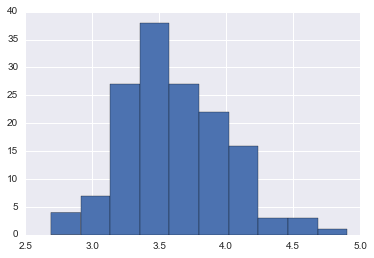

In [10]:
data[data['Patient ID'] == 3]['VO2/kg STPD (ml/kg/m)'].hist()

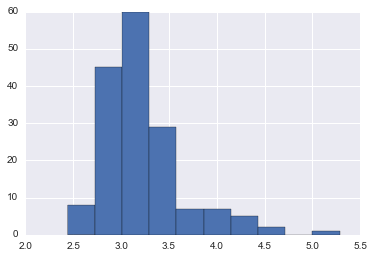

In [11]:
data[data['Patient ID'] == 4]['VO2/kg STPD (ml/kg/m)'].hist()

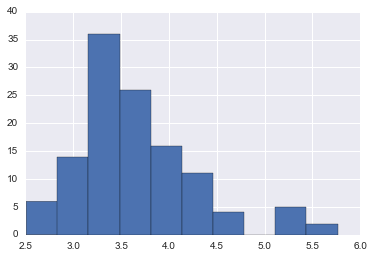

In [12]:
data[data['Patient ID'] == 5]['VO2/kg STPD (ml/kg/m)'].hist()